# Experiment's Exploratory Data Analisys

Explores the results of the experiments.

In [1]:
%matplotlib inline
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from pymongo import MongoClient

from teamspector.distance_correlation import distcorr

db = MongoClient().imdbws
df = pd.DataFrame(list(db.exp_1.find())).set_index('_id')
df = df.drop(['title', 'ypct_rating', 'ypct_votes'], axis=1)

Best features by correlation to `ypct` and `top100`:

**TODO**: Show only the best aggregation of each kind on these lists.

In [2]:
c = df[df.columns.drop(labels=['top100'])].corr(method='spearman')['ypct']
order = c.abs().sort_values(ascending = False).index
print(c[order].iloc[1:].head(20))

ego_previous_votes_mean        0.717140
ego_previous_votes_maximum     0.716763
ego_previous_ypct_maximum      0.712448
ego_previous_votes_median      0.710613
ego_previous_ypct_median       0.703778
ego_previous_ypct_mean         0.697563
team_previous_votes            0.695072
team_previous_ypct             0.686968
ego_previous_votes_minimum     0.579560
ego_previous_ypct_minimum      0.572180
ego_previous_rating_std_dev    0.515555
team_previous_top100           0.489188
ego_previous_top100_maximum    0.486181
ego_previous_top100_mean       0.485534
ego_previous_top100_std_dev    0.476817
team_size                      0.398640
ego_closeness_maximum          0.397032
ego_closeness_minimum          0.390339
ego_closeness_mean             0.384523
ego_network_constraint_mean   -0.384120
Name: ypct, dtype: float64


In [3]:
feat = list(df.columns)
feat.remove('top100')
feat.remove('ypct')

In [4]:
result = []
for x in feat:
    if 'previous' in x:
        filled = df[x].fillna(df[x].dropna().min())
    else:
        filled = df[x]
    c = stats.pointbiserialr(filled, df['top100'])
    result.append((c.correlation, c.pvalue, x))
for x in sorted(result, key=lambda x: abs(x[0]), reverse=True)[:20]:
    print("{:35} {:.4f} (p-value: {:.4f})".format(x[2], x[0], x[1]))

team_previous_top100                0.3882 (p-value: 0.0000)
ego_previous_top100_mean            0.3876 (p-value: 0.0000)
ego_previous_top100_maximum         0.3625 (p-value: 0.0000)
ego_previous_top100_median          0.3445 (p-value: 0.0000)
ego_previous_votes_median           0.3442 (p-value: 0.0000)
ego_previous_votes_mean             0.3436 (p-value: 0.0000)
ego_previous_top100_std_dev         0.3372 (p-value: 0.0000)
ego_previous_votes_maximum          0.3368 (p-value: 0.0000)
team_previous_votes                 0.3303 (p-value: 0.0000)
ego_previous_rating_std_dev         0.3047 (p-value: 0.0000)
ego_previous_votes_minimum          0.2832 (p-value: 0.0000)
ego_previous_rating_maximum         0.2595 (p-value: 0.0000)
ego_previous_rating_mean            0.2438 (p-value: 0.0000)
ego_previous_rating_median          0.2435 (p-value: 0.0000)
team_previous_rating                0.2426 (p-value: 0.0000)
ego_previous_ypct_median            0.2354 (p-value: 0.0000)
ego_previous_ypct_mean  

In [5]:
result = []
dfs = df.sample(n=800, random_state=1)
for x in feat:
    if 'previous' in x:
        filled = dfs[x].fillna(dfs[x].dropna().min())
    else:
        filled = dfs[x]
    c = distcorr(filled, dfs['ypct'], pval=False)
    result.append((c, x))
for x in sorted(result, key=lambda x: abs(x[0]), reverse=True)[:20]:
    print("{:35} {:.4f}".format(x[1], x[0]))

ego_previous_votes_mean             0.6753
ego_previous_votes_maximum          0.6742
ego_previous_ypct_median            0.6736
ego_previous_votes_median           0.6688
ego_previous_ypct_mean              0.6684
ego_previous_ypct_maximum           0.6672
team_previous_ypct                  0.6585
team_previous_votes                 0.6502
ego_previous_ypct_minimum           0.5596
ego_previous_votes_minimum          0.5536
ego_previous_rating_maximum         0.4608
team_previous_rating                0.4518
ego_previous_rating_mean            0.4500
ego_previous_rating_median          0.4494
ego_previous_rating_minimum         0.4243
ego_previous_rating_std_dev         0.4036
ego_previous_top100_std_dev         0.3857
ego_previous_top100_maximum         0.3833
team_previous_top100                0.3821
ego_previous_top100_mean            0.3761


**TODO:** Summarize `previous_votes`, `previous_ratings`, `previous_yptc` and `previous_top100` into a single section.

## Previous Votes

Scatter plot of `previous_votes` features and `ypct`:

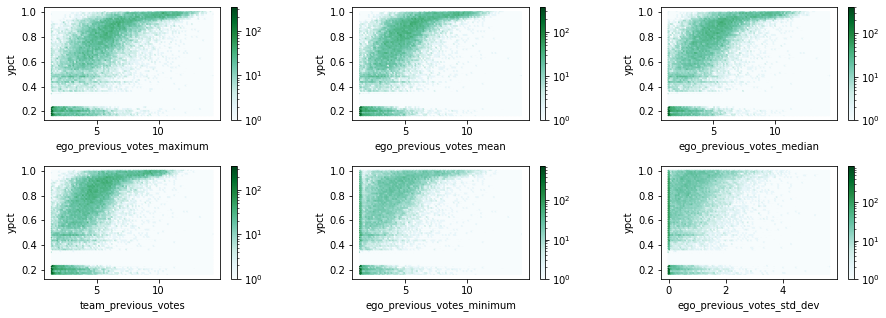

In [6]:
f = ['ego_previous_votes_maximum',
'ego_previous_votes_mean',
'ego_previous_votes_median',
'team_previous_votes',
'ego_previous_votes_minimum',
'ego_previous_votes_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')

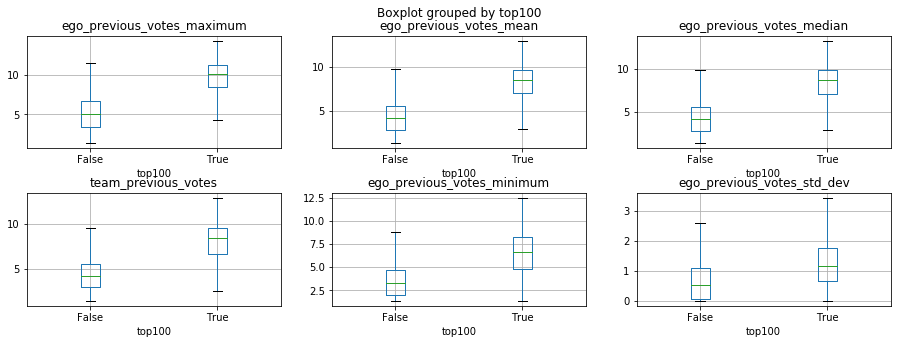

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])


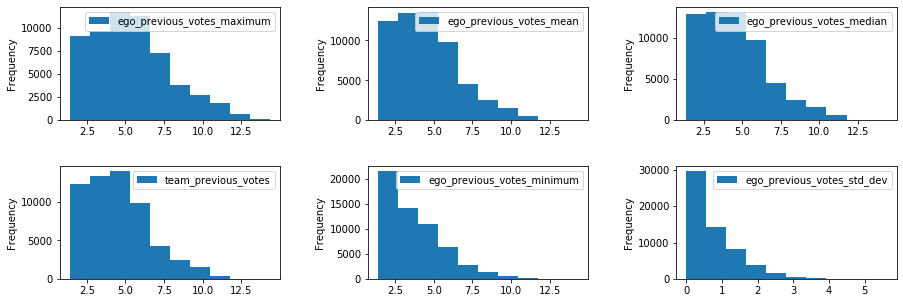

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index])

Plot with boxplots of `ego_previous_votes_maximum` every year:

In [9]:
dfx[f].corr()

,ego_previous_votes_maximum,ego_previous_votes_mean,ego_previous_votes_median,team_previous_votes,ego_previous_votes_minimum,ego_previous_votes_std_dev,ypct,year
ego_previous_votes_maximum,1.000000,0.943256,0.921369,0.913166,0.723283,0.608908,0.665206,0.160486
ego_previous_votes_mean,0.943256,1.000000,0.988635,0.962718,0.897817,0.331817,0.657357,0.161036
ego_previous_votes_median,0.921369,0.988635,1.000000,0.953101,0.870405,0.330263,0.650618,0.161188
team_previous_votes,0.913166,0.962718,0.953101,1.000000,0.855922,0.340008,0.639122,0.166006
ego_previous_votes_minimum,0.723283,0.897817,0.870405,0.855922,1.000000,-0.091713,0.531589,0.129974
ego_previous_votes_std_dev,0.608908,0.331817,0.330263,0.340008,-0.091713,1.000000,0.341042,0.083332
ypct,0.665206,0.657357,0.650618,0.639122,0.531589,0.341042,1.000000,0.104006
year,0.160486,0.161036,0.161188,0.166006,0.129974,0.083332,0.104006,1.000000


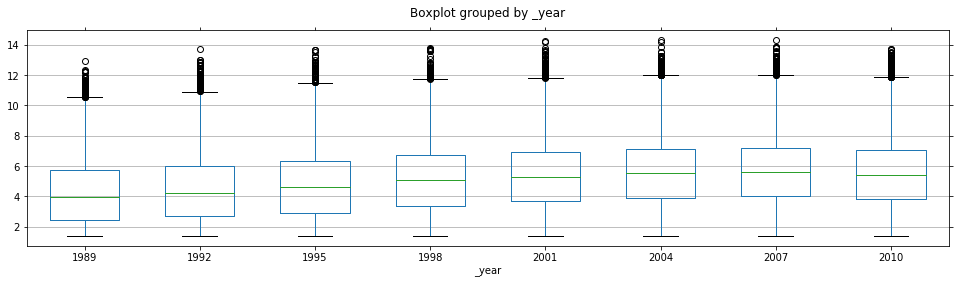

In [10]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('ego_previous_votes_maximum', by='_year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

## Previous Ratings

Scatter plot of `previous_ratings` features and `ypct`:

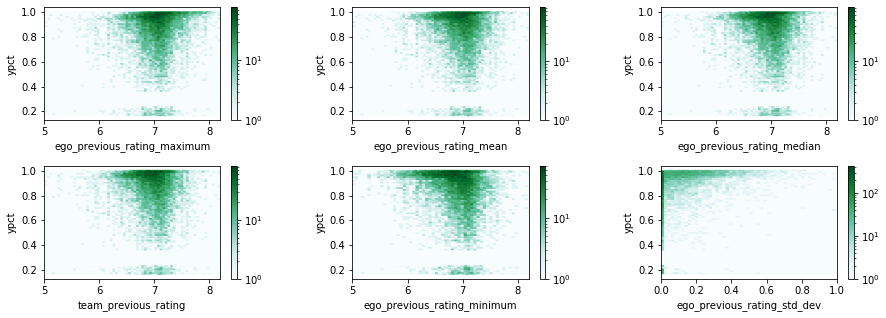

In [11]:
f = ['ego_previous_rating_maximum',
'ego_previous_rating_mean',
'ego_previous_rating_median',
'team_previous_rating',
'ego_previous_rating_minimum',
'ego_previous_rating_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    ax = dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')
    if i != 5:
        ax.set_xlim(5, 8.2)
    else:
        ax.set_xlim(0, 1)

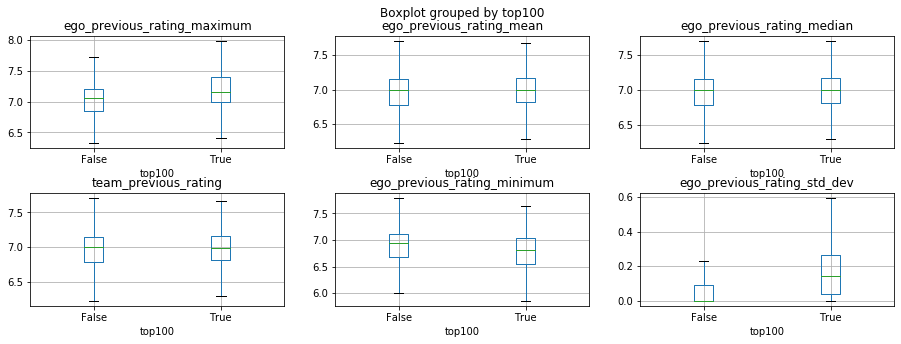

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

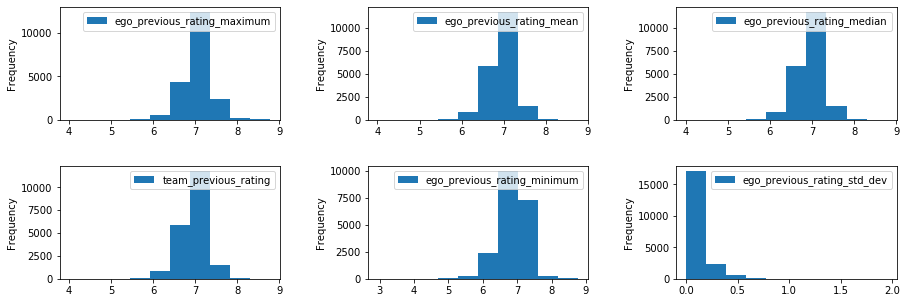

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index])

In [14]:
dfx[f].corr()

,ego_previous_rating_maximum,ego_previous_rating_mean,ego_previous_rating_median,team_previous_rating,ego_previous_rating_minimum,ego_previous_rating_std_dev,ypct,year
ego_previous_rating_maximum,1.000000,0.893911,0.873591,0.874107,0.656122,0.285325,0.047455,-0.078885
ego_previous_rating_mean,0.893911,1.000000,0.989138,0.972825,0.914357,-0.155637,-0.091917,-0.090668
ego_previous_rating_median,0.873591,0.989138,1.000000,0.962924,0.889845,-0.147605,-0.089991,-0.088547
team_previous_rating,0.874107,0.972825,0.962924,1.000000,0.884516,-0.138426,-0.089614,-0.096793
ego_previous_rating_minimum,0.656122,0.914357,0.889845,0.884516,1.000000,-0.525558,-0.200032,-0.085951
ego_previous_rating_std_dev,0.285325,-0.155637,-0.147605,-0.138426,-0.525558,1.000000,0.298831,0.015894
ypct,0.047455,-0.091917,-0.089991,-0.089614,-0.200032,0.298831,1.000000,0.104006
year,-0.078885,-0.090668,-0.088547,-0.096793,-0.085951,0.015894,0.104006,1.000000


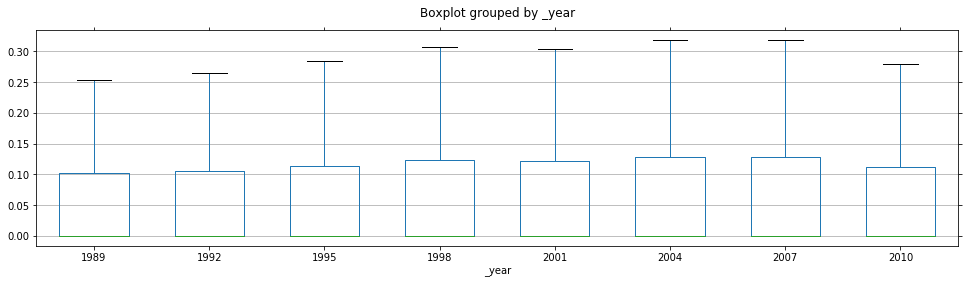

In [15]:
ax = df.boxplot('ego_previous_rating_std_dev', by='_year', figsize=(16,4), showfliers=False, widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

## Closeness

Scatter plot of `closeness` features and `ypct`:

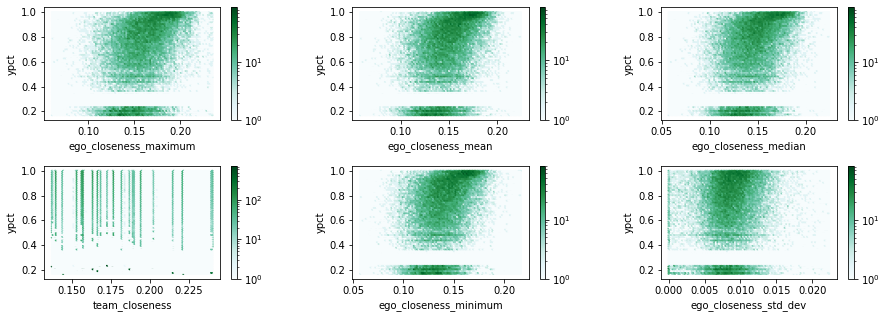

In [16]:
f = ['ego_closeness_maximum',
'ego_closeness_mean',
'ego_closeness_median',
'team_closeness',
'ego_closeness_minimum',
'ego_closeness_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')    

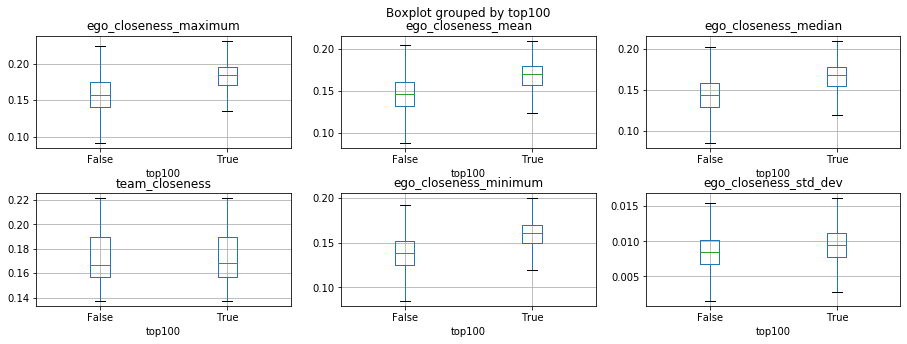

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

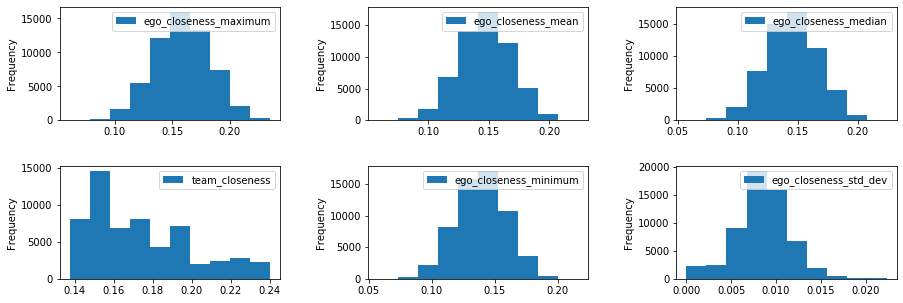

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index])

In [19]:
dfx[f].corr()

,ego_closeness_maximum,ego_closeness_mean,ego_closeness_median,team_closeness,ego_closeness_minimum,ego_closeness_std_dev,ypct,year
ego_closeness_maximum,1.000000,0.981289,0.947193,0.039214,0.970829,0.638688,0.360078,-0.102135
ego_closeness_mean,0.981289,1.000000,0.987465,0.037134,0.989862,0.533541,0.347781,-0.117804
ego_closeness_median,0.947193,0.987465,1.000000,0.035097,0.968820,0.479154,0.333361,-0.121260
team_closeness,0.039214,0.037134,0.035097,1.000000,0.037686,0.024570,-0.002885,-0.027341
ego_closeness_minimum,0.970829,0.989862,0.968820,0.037686,1.000000,0.453129,0.353717,-0.116873
ego_closeness_std_dev,0.638688,0.533541,0.479154,0.024570,0.453129,1.000000,0.143174,-0.036597
ypct,0.360078,0.347781,0.333361,-0.002885,0.353717,0.143174,1.000000,0.104006
year,-0.102135,-0.117804,-0.121260,-0.027341,-0.116873,-0.036597,0.104006,1.000000


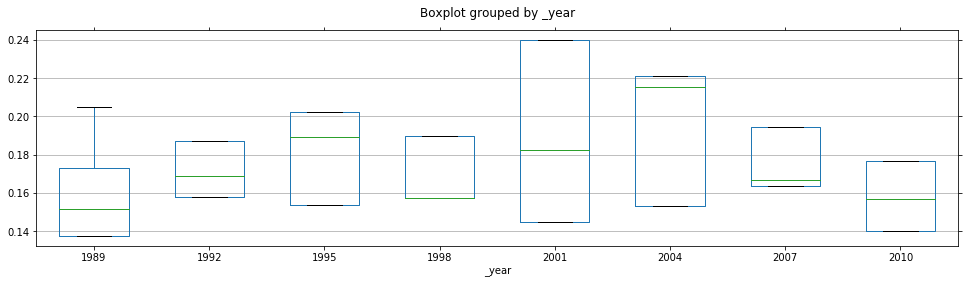

In [20]:
ax = df.boxplot('team_closeness', by='_year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

## Team Size

Scatter plot of `team_size` and `ypct`:

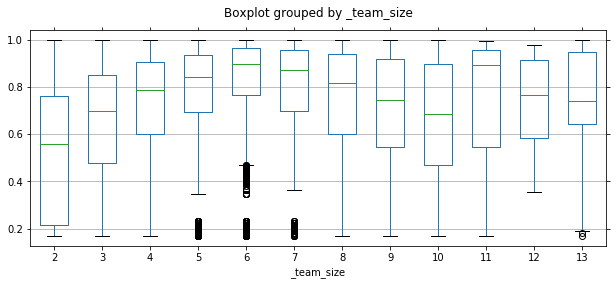

In [21]:
df['_team_size'] = df.team_size.map(lambda x: x if x < 13 else 13)
ax = df.boxplot('ypct', by='_team_size', figsize=(10,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

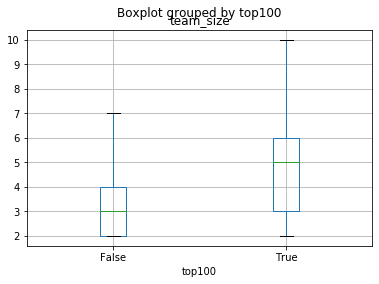

In [22]:
_ = df.boxplot('team_size', by='top100', showfliers=False)

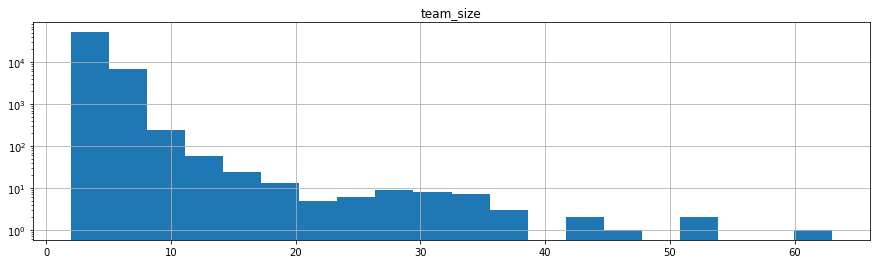

In [23]:
ax = df.hist('team_size', log=True, bins=20, figsize=(15,4))

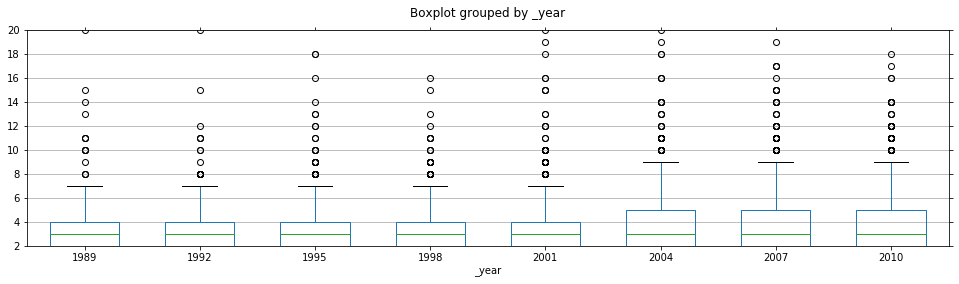

In [24]:
ax = df.boxplot('team_size', by='_year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.set_ylim(2, 20)
ax.xaxis.grid(False)

## Network Constraint

Scatter plot of `network_constraint` features and `ypct`:

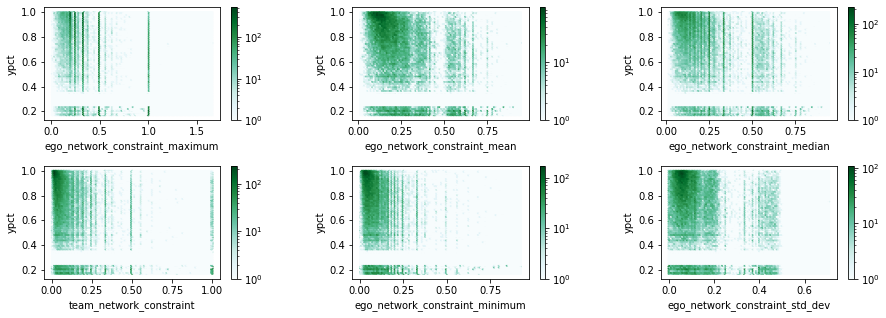

In [25]:
f = ['ego_network_constraint_maximum',
'ego_network_constraint_mean',
'ego_network_constraint_median',
'team_network_constraint',
'ego_network_constraint_minimum',
'ego_network_constraint_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')    

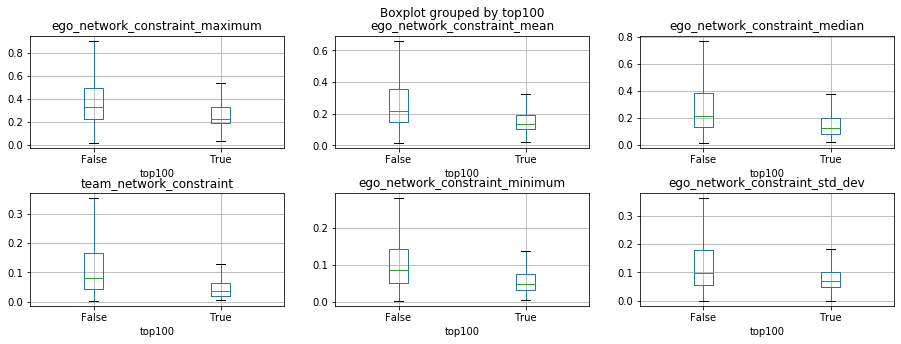

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

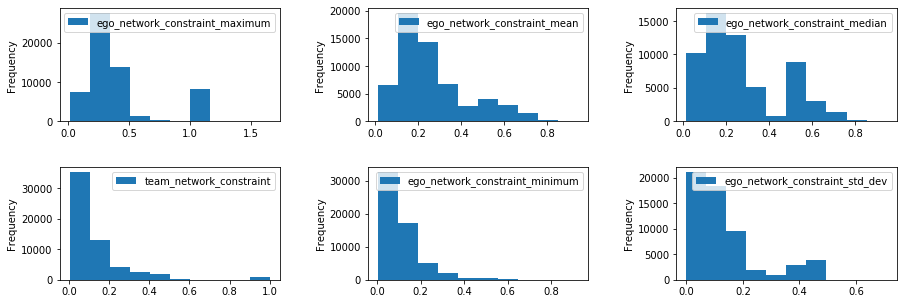

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index])

In [28]:
dfx[f].corr()

,ego_network_constraint_maximum,ego_network_constraint_mean,ego_network_constraint_median,team_network_constraint,ego_network_constraint_minimum,ego_network_constraint_std_dev,ypct,year
ego_network_constraint_maximum,1.000000,0.948033,0.865150,0.410649,0.471349,0.944502,-0.319352,0.014359
ego_network_constraint_mean,0.948033,1.000000,0.962352,0.606305,0.679955,0.813969,-0.360797,0.016998
ego_network_constraint_median,0.865150,0.962352,1.000000,0.589672,0.633641,0.741788,-0.348101,0.024782
team_network_constraint,0.410649,0.606305,0.589672,1.000000,0.855940,0.147253,-0.249225,0.023115
ego_network_constraint_minimum,0.471349,0.679955,0.633641,0.855940,1.000000,0.165098,-0.304018,-0.005666
ego_network_constraint_std_dev,0.944502,0.813969,0.741788,0.147253,0.165098,1.000000,-0.254027,0.016366
ypct,-0.319352,-0.360797,-0.348101,-0.249225,-0.304018,-0.254027,1.000000,0.104006
year,0.014359,0.016998,0.024782,0.023115,-0.005666,0.016366,0.104006,1.000000


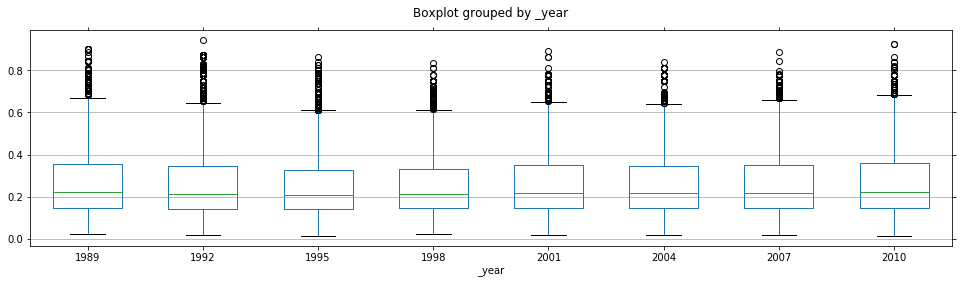

In [29]:
ax = df.boxplot('ego_network_constraint_mean', by='_year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

## Shared Collaborators in Pairs

Scatter plot of `pair_shared_collaborators` features and `ypct`:

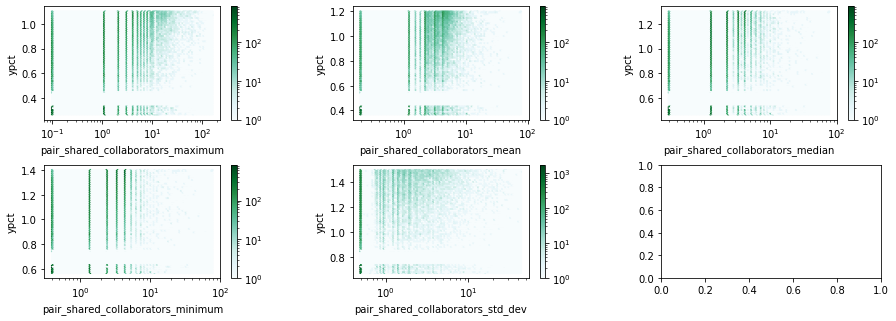

In [30]:
f = ['pair_shared_collaborators_maximum',
'pair_shared_collaborators_mean',
'pair_shared_collaborators_median',
'pair_shared_collaborators_minimum',
'pair_shared_collaborators_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    dfx = dfx.add(0.1, axis=[x])
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log', xscale='log')    

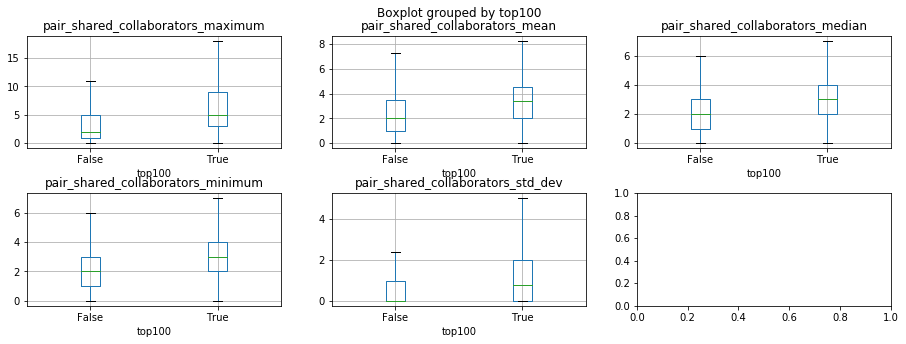

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

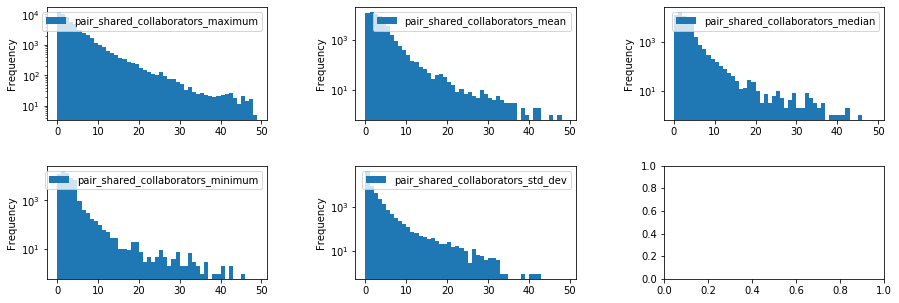

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index], bins=range(0,50), logy=True)

In [33]:
dfx[f].corr()

,pair_shared_collaborators_maximum,pair_shared_collaborators_mean,pair_shared_collaborators_median,pair_shared_collaborators_minimum,pair_shared_collaborators_std_dev,ypct,year
pair_shared_collaborators_maximum,1.000000,0.799078,0.571903,0.488353,0.920064,0.218780,0.019675
pair_shared_collaborators_mean,0.799078,1.000000,0.920852,0.862336,0.620873,0.230763,0.008182
pair_shared_collaborators_median,0.571903,0.920852,1.000000,0.949171,0.302972,0.203634,0.002723
pair_shared_collaborators_minimum,0.488353,0.862336,0.949171,1.000000,0.182541,0.206877,0.018460
pair_shared_collaborators_std_dev,0.920064,0.620873,0.302972,0.182541,1.000000,0.168040,0.009698
ypct,0.218780,0.230763,0.203634,0.206877,0.168040,1.000000,0.104006
year,0.019675,0.008182,0.002723,0.018460,0.009698,0.104006,1.000000


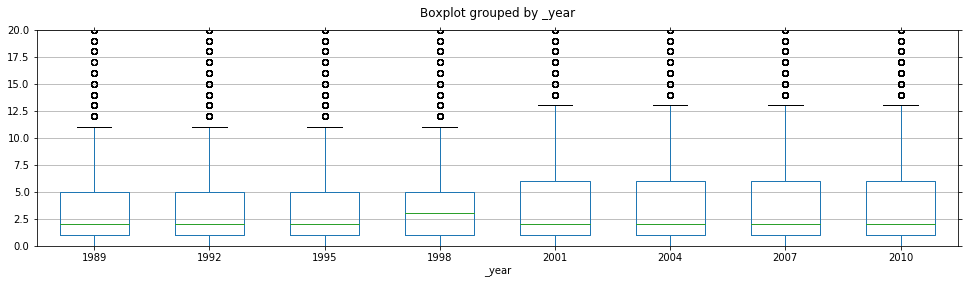

In [34]:
ax = df.boxplot('pair_shared_collaborators_maximum', by='_year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.set_ylim(0, 20)
ax.xaxis.grid(False)

## Neighbour Overlap in Pairs

Scatter plot of `pair_neighbour_overlap` features and `ypct`:

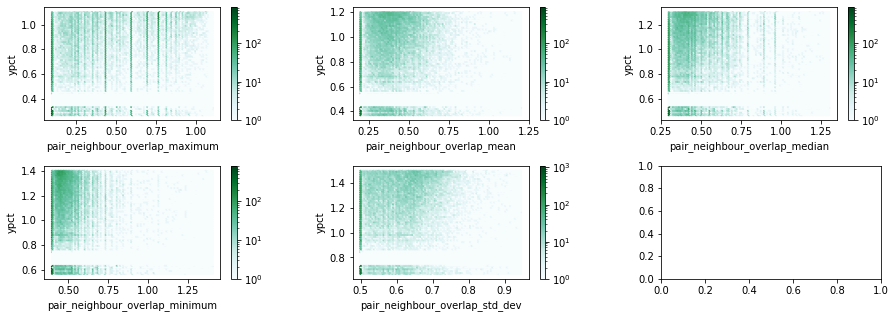

In [35]:
f = ['pair_neighbour_overlap_maximum',
'pair_neighbour_overlap_mean',
'pair_neighbour_overlap_median',
'pair_neighbour_overlap_minimum',
'pair_neighbour_overlap_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    dfx = dfx.add(0.1, axis=[x])
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')    

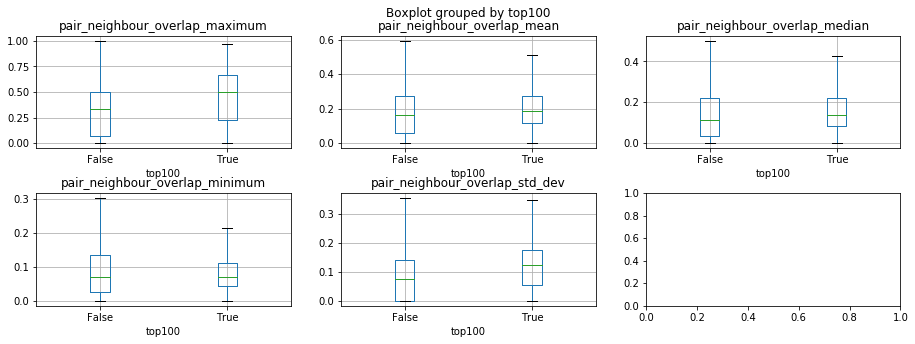

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

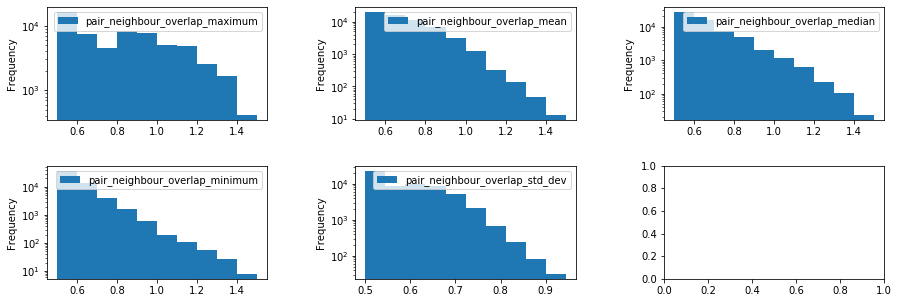

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index], logy=True)

In [38]:
dfx[f].corr()

,pair_neighbour_overlap_maximum,pair_neighbour_overlap_mean,pair_neighbour_overlap_median,pair_neighbour_overlap_minimum,pair_neighbour_overlap_std_dev,ypct,year
pair_neighbour_overlap_maximum,1.000000,0.859789,0.710236,0.571858,0.891687,0.294832,0.103700
pair_neighbour_overlap_mean,0.859789,1.000000,0.942761,0.864659,0.645512,0.178489,0.089577
pair_neighbour_overlap_median,0.710236,0.942761,1.000000,0.857579,0.461580,0.132397,0.073304
pair_neighbour_overlap_minimum,0.571858,0.864659,0.857579,1.000000,0.225901,0.043686,0.055535
pair_neighbour_overlap_std_dev,0.891687,0.645512,0.461580,0.225901,1.000000,0.284560,0.093780
ypct,0.294832,0.178489,0.132397,0.043686,0.284560,1.000000,0.104006
year,0.103700,0.089577,0.073304,0.055535,0.093780,0.104006,1.000000


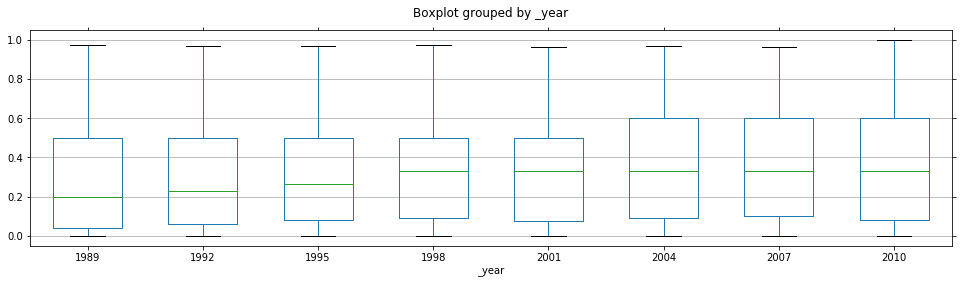

In [39]:
ax = df.boxplot('pair_neighbour_overlap_maximum', by='_year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

## Degree

Scatter plot of `degree` features and `ypct`:

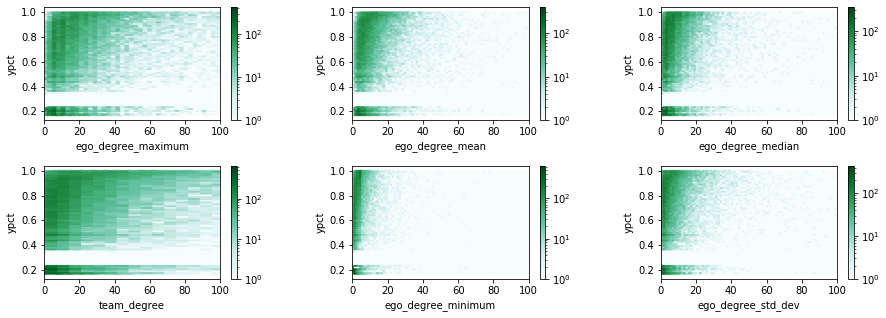

In [40]:
f = ['ego_degree_maximum',
'ego_degree_mean',
'ego_degree_median',
'team_degree',
'ego_degree_minimum',
'ego_degree_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    ax = dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')
    ax.set_xlim(0, 100)

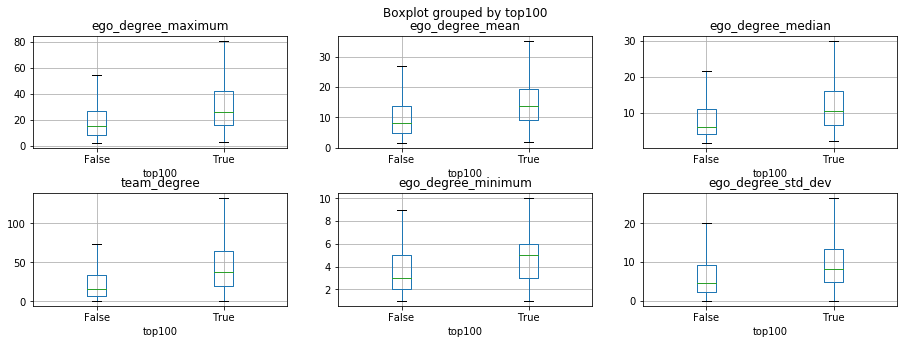

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

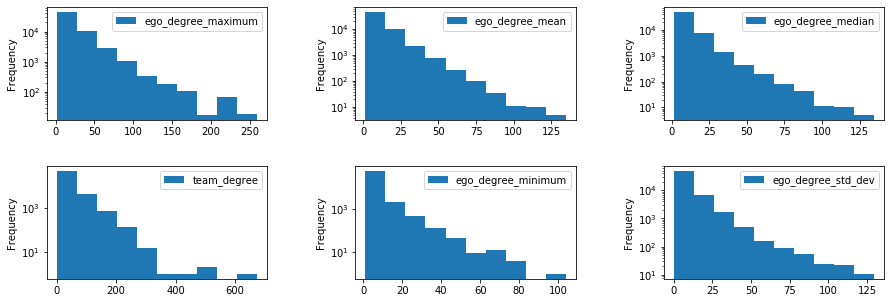

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index], logy=True)

In [43]:
dfx[f].corr()

,ego_degree_maximum,ego_degree_mean,ego_degree_median,team_degree,ego_degree_minimum,ego_degree_std_dev,ypct,year
ego_degree_maximum,1.000000,0.911081,0.627924,0.936892,0.341627,0.968722,0.189786,-0.036051
ego_degree_mean,0.911081,1.000000,0.868978,0.915674,0.576156,0.851744,0.175282,-0.065387
ego_degree_median,0.627924,0.868978,1.000000,0.712289,0.608889,0.552843,0.130831,-0.074262
team_degree,0.936892,0.915674,0.712289,1.000000,0.442184,0.860386,0.235807,-0.038606
ego_degree_minimum,0.341627,0.576156,0.608889,0.442184,1.000000,0.152767,0.122249,-0.064222
ego_degree_std_dev,0.968722,0.851744,0.552843,0.860386,0.152767,1.000000,0.140499,-0.033124
ypct,0.189786,0.175282,0.130831,0.235807,0.122249,0.140499,1.000000,0.104006
year,-0.036051,-0.065387,-0.074262,-0.038606,-0.064222,-0.033124,0.104006,1.000000


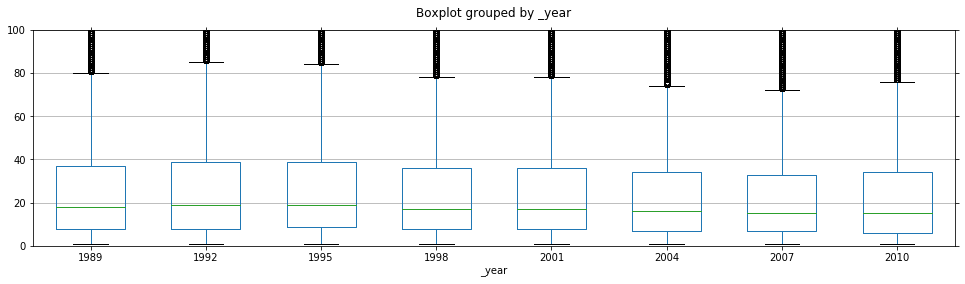

In [44]:
ax = df.boxplot('team_degree', by='_year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.set_ylim(0, 100)
ax.xaxis.grid(False)

## Past Experience

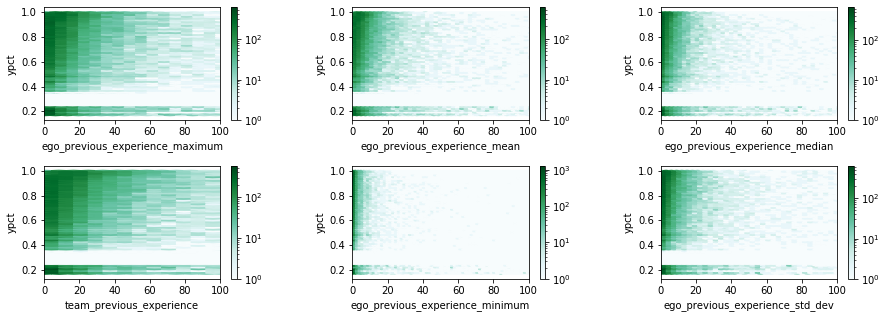

In [45]:
f = ['ego_previous_experience_maximum',
'ego_previous_experience_mean',
'ego_previous_experience_median',
'team_previous_experience',
'ego_previous_experience_minimum',
'ego_previous_experience_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    ax = dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')
    ax.set_xlim(0, 100)

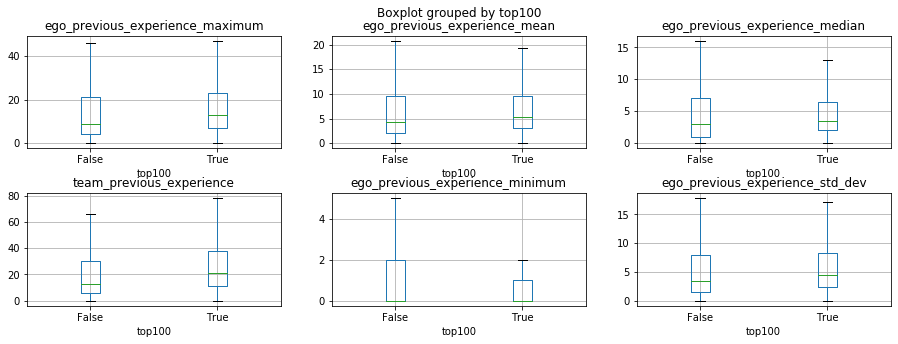

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

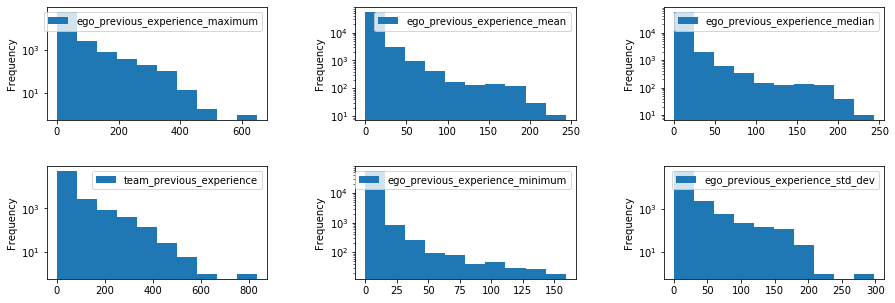

In [47]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index], logy=True)

In [48]:
dfx[f].corr()

,ego_previous_experience_maximum,ego_previous_experience_mean,ego_previous_experience_median,team_previous_experience,ego_previous_experience_minimum,ego_previous_experience_std_dev,ypct,year
ego_previous_experience_maximum,1.000000,0.930525,0.766147,0.957100,0.430986,0.976042,-0.115837,-0.150913
ego_previous_experience_mean,0.930525,1.000000,0.935257,0.905009,0.659914,0.876210,-0.167886,-0.160168
ego_previous_experience_median,0.766147,0.935257,1.000000,0.762479,0.699788,0.706267,-0.183119,-0.148336
team_previous_experience,0.957100,0.905009,0.762479,1.000000,0.459533,0.905989,-0.069866,-0.157161
ego_previous_experience_minimum,0.430986,0.659914,0.699788,0.459533,1.000000,0.259325,-0.142835,-0.096262
ego_previous_experience_std_dev,0.976042,0.876210,0.706267,0.905989,0.259325,1.000000,-0.120100,-0.142616
ypct,-0.115837,-0.167886,-0.183119,-0.069866,-0.142835,-0.120100,1.000000,0.104006
year,-0.150913,-0.160168,-0.148336,-0.157161,-0.096262,-0.142616,0.104006,1.000000


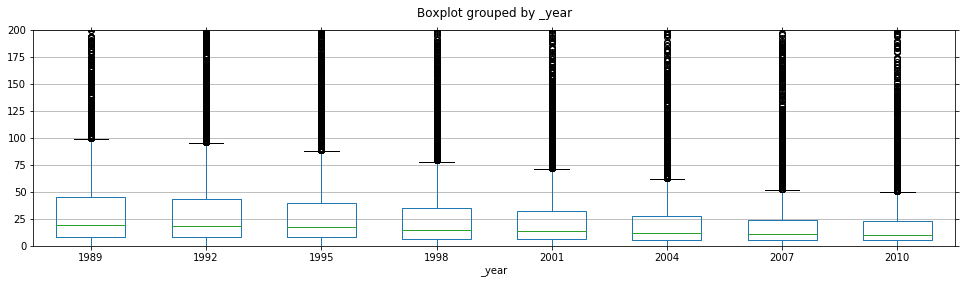

In [49]:
ax = df.boxplot('team_previous_experience', by='_year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.set_ylim(0, 200)
ax.xaxis.grid(False)

## Betweenness 
`ego_betweenness_maximum`

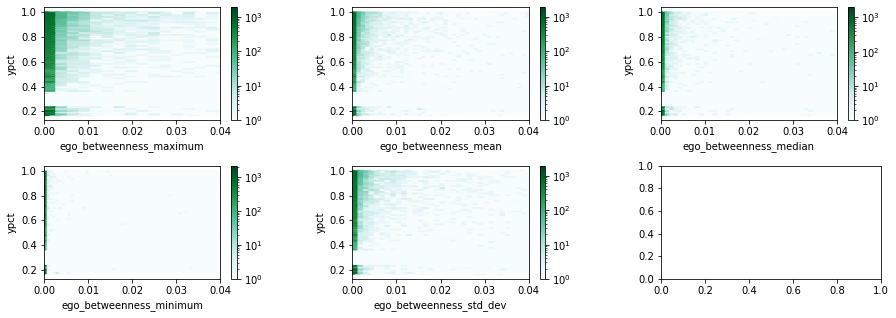

In [50]:
f = ['ego_betweenness_maximum',
'ego_betweenness_mean',
'ego_betweenness_median',
'ego_betweenness_minimum',
'ego_betweenness_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    ax = dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')
    ax.set_xlim(0, 0.04)

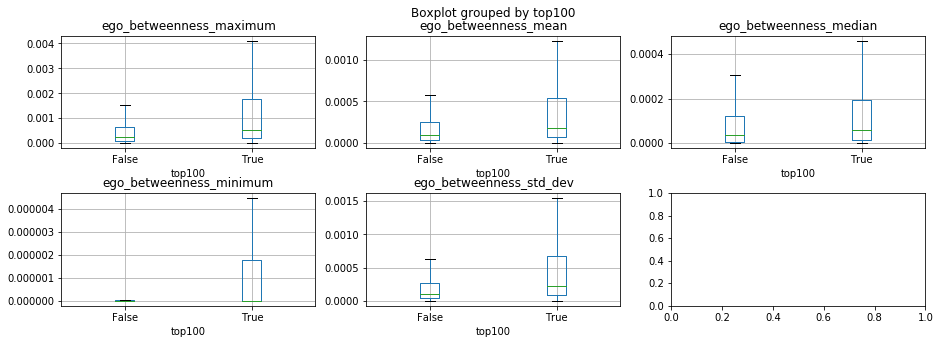

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

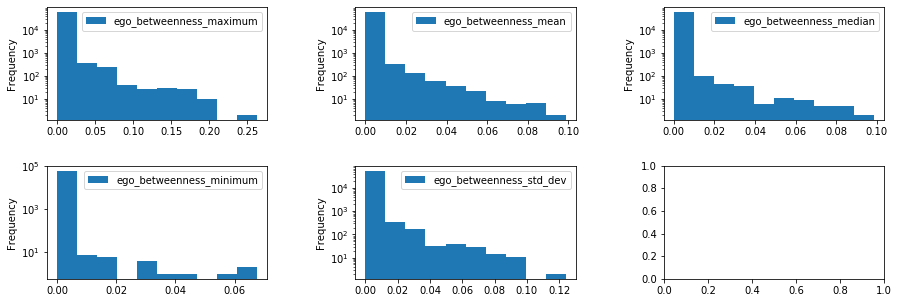

In [52]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index], logy=True)

In [53]:
dfx[f].corr()

,ego_betweenness_maximum,ego_betweenness_mean,ego_betweenness_median,ego_betweenness_minimum,ego_betweenness_std_dev,ypct,year
ego_betweenness_maximum,1.000000,0.933013,0.482877,0.122185,0.991918,0.051172,-0.020703
ego_betweenness_mean,0.933013,1.000000,0.726744,0.275379,0.943323,0.031786,-0.027970
ego_betweenness_median,0.482877,0.726744,1.000000,0.363916,0.504065,-0.001521,-0.027006
ego_betweenness_minimum,0.122185,0.275379,0.363916,1.000000,0.054320,0.002093,-0.021943
ego_betweenness_std_dev,0.991918,0.943323,0.504065,0.054320,1.000000,0.042128,-0.020333
ypct,0.051172,0.031786,-0.001521,0.002093,0.042128,1.000000,0.104006
year,-0.020703,-0.027970,-0.027006,-0.021943,-0.020333,0.104006,1.000000


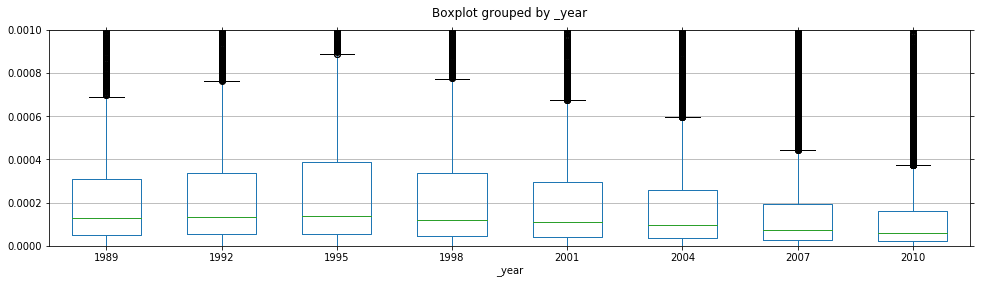

In [54]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('ego_betweenness_mean', by='_year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.set_ylim(0, 0.001)
ax.xaxis.grid(False)

## Pair Past Experience

`pair_past_experience_mean`

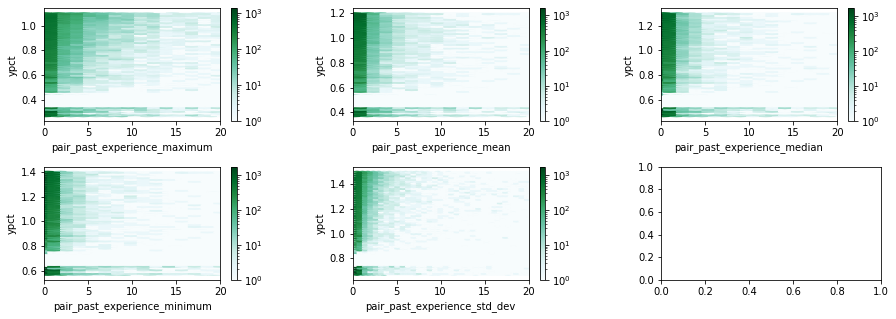

In [55]:
f = ['pair_past_experience_maximum',
'pair_past_experience_mean',
'pair_past_experience_median',
'pair_past_experience_minimum',
'pair_past_experience_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    dfx = dfx.add(0.1, axis=[x])
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    ax = dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')
    ax.set_xlim(0, 20)

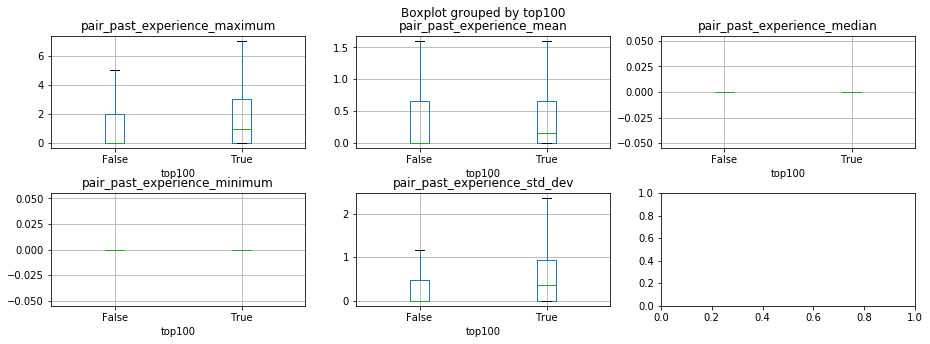

In [56]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

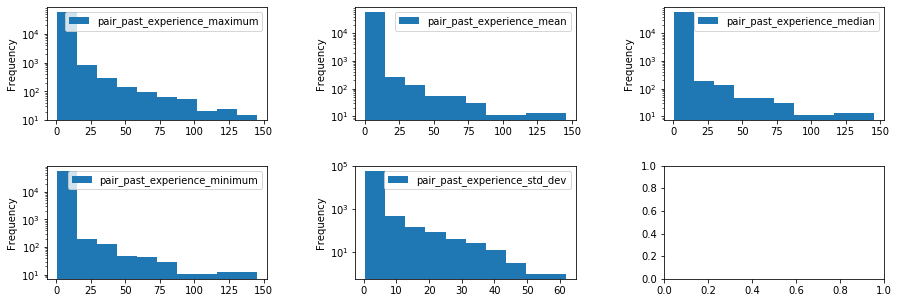

In [57]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index], logy=True)

In [58]:
dfx[f].corr()

,pair_past_experience_maximum,pair_past_experience_mean,pair_past_experience_median,pair_past_experience_minimum,pair_past_experience_std_dev,ypct,year
pair_past_experience_maximum,1.000000,0.799622,0.688962,0.665962,0.732990,-0.035718,-0.053125
pair_past_experience_mean,0.799622,1.000000,0.979531,0.971801,0.238400,-0.130841,-0.060703
pair_past_experience_median,0.688962,0.979531,1.000000,0.995647,0.051015,-0.141320,-0.055525
pair_past_experience_minimum,0.665962,0.971801,0.995647,1.000000,0.015143,-0.142596,-0.053274
pair_past_experience_std_dev,0.732990,0.238400,0.051015,0.015143,1.000000,0.057663,-0.031270
ypct,-0.035718,-0.130841,-0.141320,-0.142596,0.057663,1.000000,0.104006
year,-0.053125,-0.060703,-0.055525,-0.053274,-0.031270,0.104006,1.000000


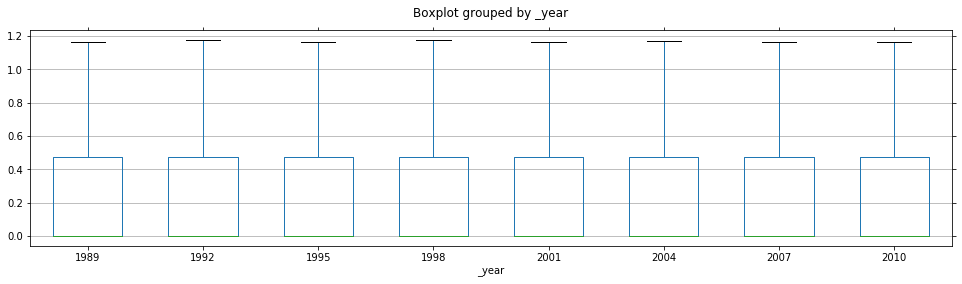

In [59]:
ax = df.boxplot('pair_past_experience_std_dev', by='_year', figsize=(16,4), widths=0.6, showfliers=False)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

## Clustering
`ego_clustering_maximum`

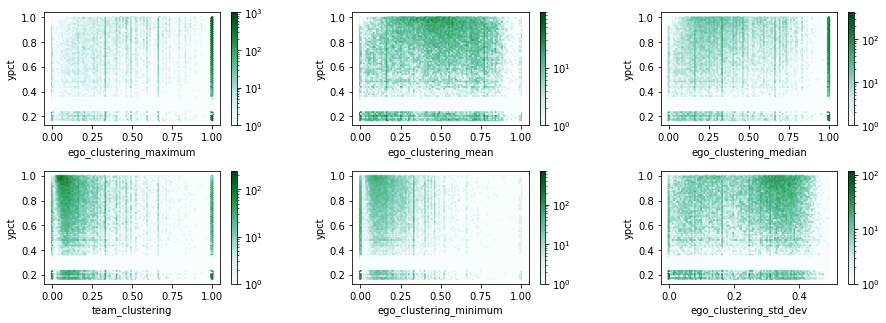

In [60]:
f = ['ego_clustering_maximum',
'ego_clustering_mean',
'ego_clustering_median',
'team_clustering',
'ego_clustering_minimum',
'ego_clustering_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')

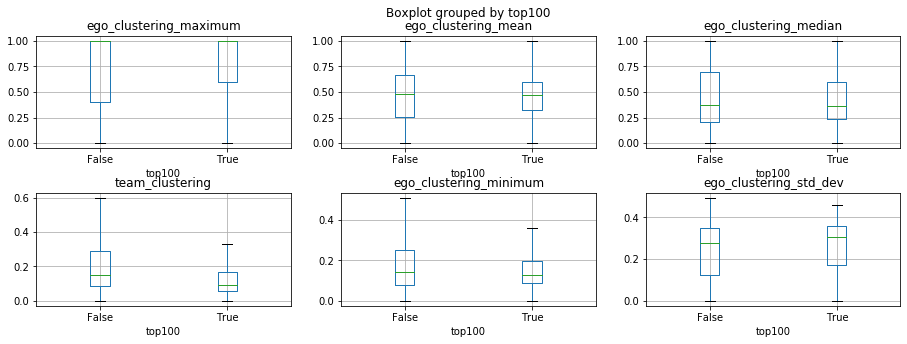

In [61]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

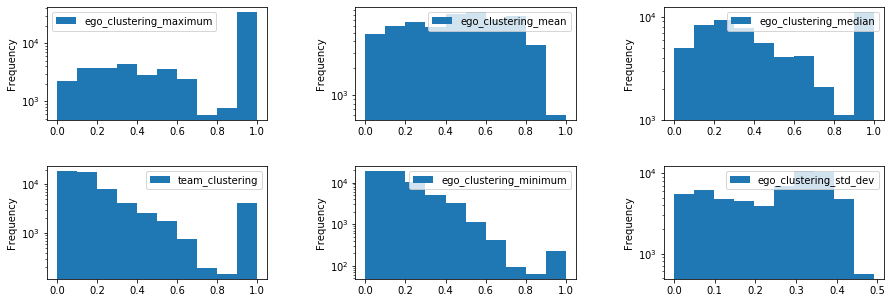

In [62]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index], logy=True)

In [63]:
dfx[f].corr()

,ego_clustering_maximum,ego_clustering_mean,ego_clustering_median,team_clustering,ego_clustering_minimum,ego_clustering_std_dev,ypct,year
ego_clustering_maximum,1.000000,0.873667,0.688174,0.093185,0.463026,0.877315,0.210689,0.087312
ego_clustering_mean,0.873667,1.000000,0.925875,0.271570,0.685527,0.651116,0.131094,0.100936
ego_clustering_median,0.688174,0.925875,1.000000,0.298694,0.569078,0.518695,0.067439,0.092104
team_clustering,0.093185,0.271570,0.298694,1.000000,0.371332,-0.015655,-0.142736,0.089423
ego_clustering_minimum,0.463026,0.685527,0.569078,0.371332,1.000000,0.029874,0.045247,0.079252
ego_clustering_std_dev,0.877315,0.651116,0.518695,-0.015655,0.029874,1.000000,0.162608,0.053738
ypct,0.210689,0.131094,0.067439,-0.142736,0.045247,0.162608,1.000000,0.104006
year,0.087312,0.100936,0.092104,0.089423,0.079252,0.053738,0.104006,1.000000


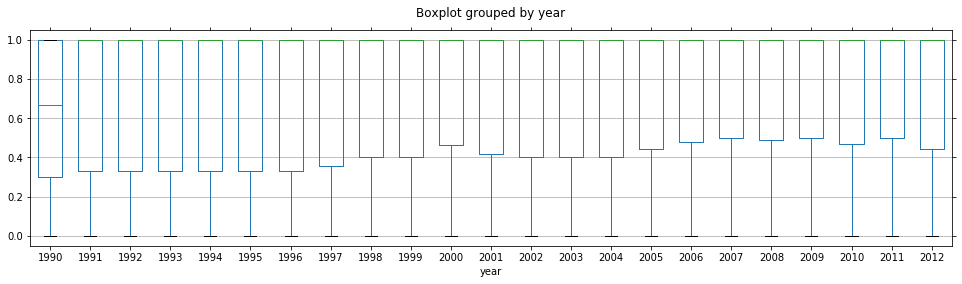

In [64]:
ax = df.boxplot('ego_clustering_maximum', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

## Square Clustering
`ego_square_clustering_maximum`

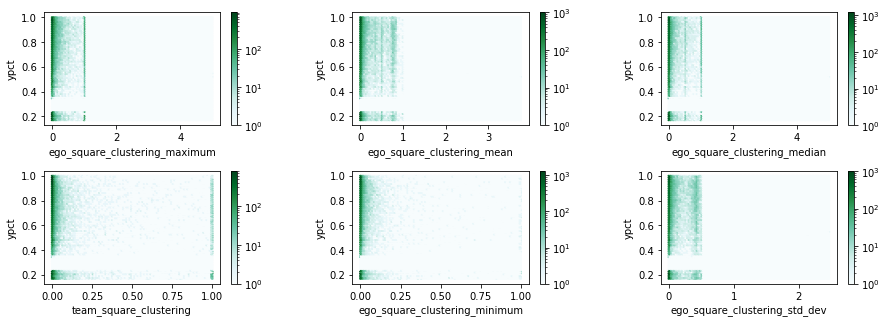

In [65]:
f = ['ego_square_clustering_maximum',
'ego_square_clustering_mean',
'ego_square_clustering_median',
'team_square_clustering',
'ego_square_clustering_minimum',
'ego_square_clustering_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')

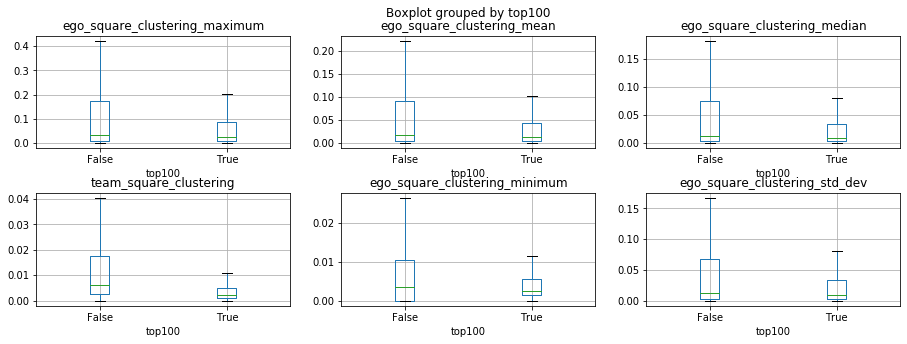

In [66]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

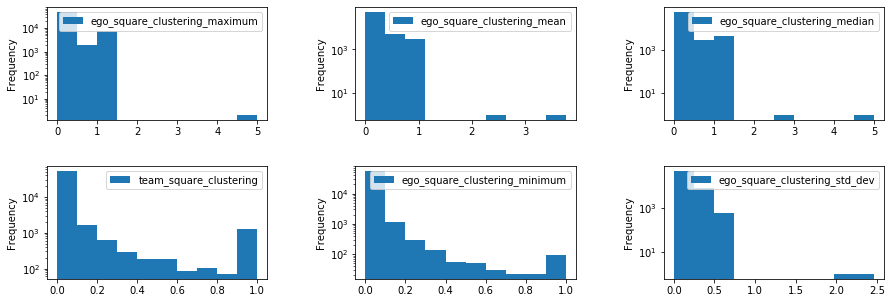

In [67]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index], logy=True)

In [68]:
dfx[f].corr()

,ego_square_clustering_maximum,ego_square_clustering_mean,ego_square_clustering_median,team_square_clustering,ego_square_clustering_minimum,ego_square_clustering_std_dev,ypct,year
ego_square_clustering_maximum,1.000000,0.958513,0.880462,0.334613,0.385770,0.976876,-0.004482,0.090049
ego_square_clustering_mean,0.958513,1.000000,0.969941,0.311823,0.448516,0.905885,-0.004080,0.084322
ego_square_clustering_median,0.880462,0.969941,1.000000,0.264401,0.377102,0.833738,0.000481,0.074503
team_square_clustering,0.334613,0.311823,0.264401,1.000000,0.267001,0.324370,-0.088707,0.068819
ego_square_clustering_minimum,0.385770,0.448516,0.377102,0.267001,1.000000,0.212343,-0.026025,0.053376
ego_square_clustering_std_dev,0.976876,0.905885,0.833738,0.324370,0.212343,1.000000,-0.007652,0.083369
ypct,-0.004482,-0.004080,0.000481,-0.088707,-0.026025,-0.007652,1.000000,0.104006
year,0.090049,0.084322,0.074503,0.068819,0.053376,0.083369,0.104006,1.000000


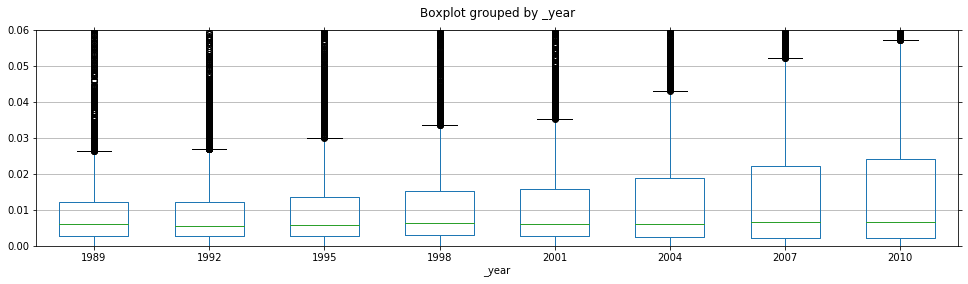

In [69]:
ax = df.boxplot('team_square_clustering', by='_year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.set_ylim(0, 0.06)
ax.xaxis.grid(False)

## Year

Whach out for year of release. Since we have more movies the latter years, this happens:

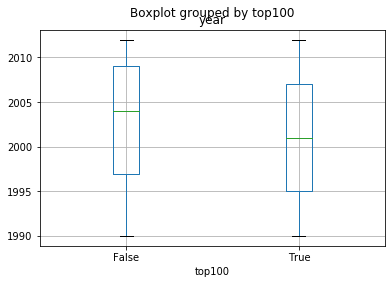

In [70]:
_ = df.boxplot('year', by='top100', showfliers=False)